<a href="https://colab.research.google.com/github/NathanielMak04/DiscordBot/blob/main/MNISTDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

y_train # double checking image



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

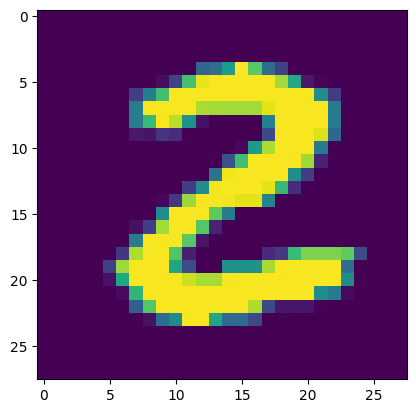

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[25])

In [ ]:
# preprocessing data
x_train, x_test = x_train / 255.0, x_test / 255.0 # normalize pixel values to [0,1] because pixel values ranges from 0 to 255



In [ ]:
# neural network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compiling and training model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=60, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9882 - loss: 0.0336 - val_accuracy: 0.9809 - val_loss: 0.0672
Epoch 2/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9903 - loss: 0.0297 - val_accuracy: 0.9826 - val_loss: 0.0654
Epoch 3/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9912 - loss: 0.0278 - val_accuracy: 0.9807 - val_loss: 0.0712
Epoch 4/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9910 - loss: 0.0267 - val_accuracy: 0.9811 - val_loss: 0.0727
Epoch 5/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9915 - loss: 0.0264 - val_accuracy: 0.9810 - val_loss: 0.0700
Epoch 6/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9920 - loss: 0.0243 - val_accuracy: 0.9825 - val_loss: 0.0697
Epoch 7/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9915 - loss: 0.0242 - val_accuracy: 0.9792 - val_loss: 0.0818
Epoch 8/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9915 - loss: 0.0237 - 

In [ ]:
# evaluate model performance
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=-1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.9812

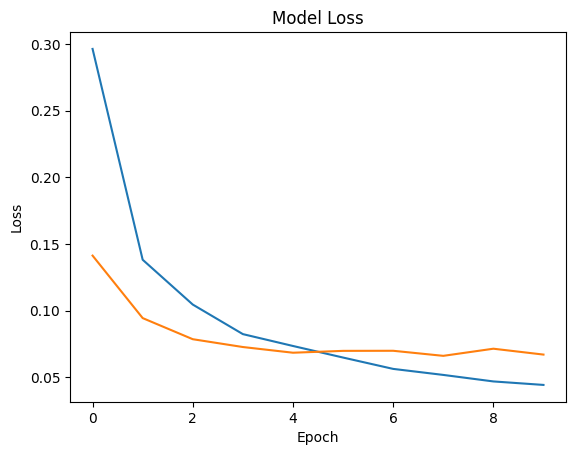

In [ ]:
# plotting loss values
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


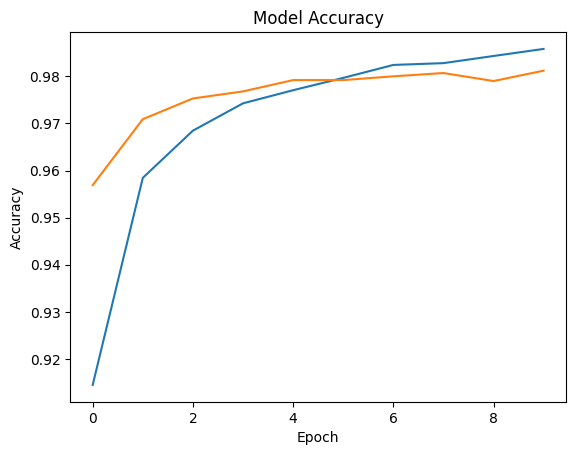

In [ ]:
# plotting accuracy scores
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()